# **IPL 2023  Full Data Analysis**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
matches = pd.read_csv('Dataset/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('Dataset/IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin method  \
0         N               Gujarat Titans  Wickets     7.0    NaN   
1         N             Rajasthan Royals  Wickets     7.0    NaN   
2         N  Royal Challengers Bangalore     Runs    14.0    NaN   
3         N               Gujarat Titans  Wickets     7.0    NaN   
4         N                 Punjab Kings  Wickets     5.0    NaN   

  Player_of_Match                                       Team1Players  \
0       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

In [5]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [7]:
matches[matches['WinningTeam'].isna()]

ID       City        Date Season MatchNumber  \
205  1178424  Bengaluru  2019-04-30   2019          49   
437   829813  Bangalore  2015-05-17   2015          55   
464   829763  Bangalore  2015-04-29   2015          29   
708   501265      Delhi  2011-05-21   2011          68   

                           Team1             Team2                  Venue  \
205  Royal Challengers Bangalore  Rajasthan Royals  M.Chinnaswamy Stadium   
437  Royal Challengers Bangalore  Delhi Daredevils  M Chinnaswamy Stadium   
464  Royal Challengers Bangalore  Rajasthan Royals  M Chinnaswamy Stadium   
708             Delhi Daredevils     Pune Warriors       Feroz Shah Kotla   

                      TossWinner TossDecision SuperOver WinningTeam  \
205             Rajasthan Royals        field       NaN         NaN   
437  Royal Challengers Bangalore        field       NaN         NaN   
464             Rajasthan Royals        field       NaN         NaN   
708             Delhi Daredevils          bat       NaN         NaN   

         WonBy  Margin method Player_of_Match  \
205  NoResults     NaN    NaN             NaN   
437  NoResults     NaN    NaN             NaN   
464  NoResults     NaN    NaN             NaN   
708  NoResults     NaN    NaN             NaN   

                                          Team1Players  \
205  ['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...   
437  ['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...   
464  ['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...   
708  ['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...   

                                          Team2Players          Umpire1  \
205  ['SV Samson', 'LS Livingstone', 'AM Rahane', '...         NJ Llong   
437  ['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...  HDPK Dharmasena   
464  ['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...        JD Cloete   
708  ['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...        SS Hazare   

          Umpire2  
205     UV Gandhe  
437  K Srinivasan  
464     PG Pathak  
708     RJ Tucker

### These matches has no Result becomes matches are stopped due to Rain or other reasons, so let's remove them from the data

In [11]:
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()

In [13]:
matches.head()

Date Season  MatchNumber                        Team1  \
0  2022-05-29   2022        Final             Rajasthan Royals   
1  2022-05-27   2022  Qualifier 2  Royal Challengers Bangalore   
2  2022-05-25   2022   Eliminator  Royal Challengers Bangalore   
3  2022-05-24   2022  Qualifier 1             Rajasthan Royals   
4  2022-05-22   2022           70          Sunrisers Hyderabad   

                  Team2                             Venue  \
0        Gujarat Titans  Narendra Modi Stadium, Ahmedabad   
1      Rajasthan Royals  Narendra Modi Stadium, Ahmedabad   
2  Lucknow Super Giants             Eden Gardens, Kolkata   
3        Gujarat Titans             Eden Gardens, Kolkata   
4          Punjab Kings          Wankhede Stadium, Mumbai   

             TossWinner TossDecision SuperOver                  WinningTeam  \
0      Rajasthan Royals          bat         N               Gujarat Titans   
1      Rajasthan Royals        field         N             Rajasthan Royals   
2  Lucknow Super Giants        field         N  Royal Challengers Bangalore   
3        Gujarat Titans        field         N               Gujarat Titans   
4   Sunrisers Hyderabad          bat         N                 Punjab Kings   

     WonBy  Margin Player_of_Match  \
0  Wickets     7.0       HH Pandya   
1  Wickets     7.0      JC Buttler   
2     Runs    14.0      RM Patidar   
3  Wickets     7.0       DA Miller   
4  Wickets     5.0   Harpreet Brar   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

In [15]:
matches[matches['Season']=='2020/21'].head(2)

Date   Season  MatchNumber           Team1                Team2  \
134  2020-11-10  2020/21        Final  Delhi Capitals       Mumbai Indians   
135  2020-11-08  2020/21  Qualifier 2  Delhi Capitals  Sunrisers Hyderabad   

                                   Venue      TossWinner TossDecision  \
134  Dubai International Cricket Stadium  Delhi Capitals          bat   
135                 Sheikh Zayed Stadium  Delhi Capitals          bat   

    SuperOver     WinningTeam    WonBy  Margin Player_of_Match  \
134         N  Mumbai Indians  Wickets     5.0        TA Boult   
135         N  Delhi Capitals     Runs    17.0      MP Stoinis   

                                          Team1Players  \
134  ['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...   
135  ['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...   

                                          Team2Players      Umpire1  \
134  ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...  CB Gaffaney   
135  ['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...   PR Reiffel   

         Umpire2  
134  Nitin Menon  
135       S Ravi

In [17]:
# Convert the Date columns into their respective data types
matches['Date'] = pd.to_datetime(matches['Date'])

In [19]:
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

In [21]:
matches.drop('Season',axis=1, inplace=True)

In [23]:
matches.head()

Date  MatchNumber                        Team1                 Team2  \
0 2022-05-29        Final             Rajasthan Royals        Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore      Rajasthan Royals   
2 2022-05-25   Eliminator  Royal Challengers Bangalore  Lucknow Super Giants   
3 2022-05-24  Qualifier 1             Rajasthan Royals        Gujarat Titans   
4 2022-05-22           70          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin Player_of_Match  \
0         N               Gujarat Titans  Wickets     7.0       HH Pandya   
1         N             Rajasthan Royals  Wickets     7.0      JC Buttler   
2         N  Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3         N               Gujarat Titans  Wickets     7.0       DA Miller   
4         N                 Punjab Kings  Wickets     5.0   Harpreet Brar   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  SEASON_INT  SEASON_END_INT  
0    Nitin Menon        2022            2022  
1    Nitin Menon        2022            2022  
2       MA Gough        2022            2022  
3      VK Sharma        2022            2022  
4  NA Patwardhan        2022            2022

In [25]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [27]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [29]:
matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [31]:
matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [33]:
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

In [35]:
matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

In [37]:
matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [39]:
matches.head()

Date  MatchNumber                        Team1                 Team2  \
0 2022-05-29        Final             Rajasthan Royals        Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore      Rajasthan Royals   
2 2022-05-25   Eliminator  Royal Challengers Bangalore  Lucknow Super Giants   
3 2022-05-24  Qualifier 1             Rajasthan Royals        Gujarat Titans   
4 2022-05-22           70          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin Player_of_Match  \
0         N               Gujarat Titans  Wickets     7.0       HH Pandya   
1         N             Rajasthan Royals  Wickets     7.0      JC Buttler   
2         N  Royal Challengers Bangalore     Runs    14.0      RM Patidar   
3         N               Gujarat Titans  Wickets     7.0       DA Miller   
4         N                 Punjab Kings  Wickets     5.0   Harpreet Brar   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  SEASON_INT  SEASON_END_INT  
0    Nitin Menon        2022            2022  
1    Nitin Menon        2022            2022  
2       MA Gough        2022            2022  
3      VK Sharma        2022            2022  
4  NA Patwardhan        2022            2022

### Okay! Now we Have cleaned Match Dataframe, let's check the Ball by Ball Datafram and Build the Statistical Dataframe out of it so that we can build the Dashbaord or Perform Visualisation out of it.

In [42]:
balls.head()

ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0        NaN  NaN               NaN  Rajasthan Royals  
1                 0        NaN  NaN               NaN  Rajasthan Royals  
2                 0        NaN  NaN               NaN  Rajasthan Royals  
3                 0        NaN  NaN               NaN  Rajasthan Royals  
4                 0        NaN  NaN               NaN  Rajasthan Royals

In [44]:
print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(225954, 17)
 -------------------- 
ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   

In [46]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

Balls_Faced
batter                     
A Ashish Reddy          196
A Badoni                139
A Chandila                7
A Chopra                 75
A Choudhary              20

In [48]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

Balls_Faced  innings
batter                              
A Ashish Reddy          196        2
A Badoni                139        2
A Chandila                7        1
A Chopra                 75        2
A Choudhary              20        2

In [50]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

Balls_Faced  innings  runs
batter                                    
A Ashish Reddy          196        2   280
A Badoni                139        2   161
A Chandila                7        1     4
A Chopra                 75        2    53
A Choudhary              20        2    25

In [52]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

Balls_Faced  innings  runs    0s
batter                                          
A Ashish Reddy          196        2   280  61.0
A Badoni                139        2   161  57.0
A Chandila                7        1     4   3.0
A Chopra                 75        2    53  45.0
A Choudhary              20        2    25   4.0

In [54]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

In [56]:
batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)


In [58]:
batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

In [60]:
batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)


In [62]:
batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

In [64]:
batsman_Stats.head()

Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s
batter                                                                       
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0

In [66]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s  \
batter                                                                          
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0   
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0   
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0   
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0   
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0   

                player_out  
batter                      
A Ashish Reddy          15  
A Badoni                 9  
A Chandila               1  
A Chopra                 5  
A Choudhary              2

In [68]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

Balls_Faced  innings  runs    0s    1s    2s   3s    4s    6s  \
batter                                                                          
A Ashish Reddy          196        2   280  61.0  83.0  20.0  1.0  16.0  15.0   
A Badoni                139        2   161  57.0  53.0  11.0  0.0  11.0   7.0   
A Chandila                7        1     4   3.0   4.0   0.0  0.0   0.0   0.0   
A Chopra                 75        2    53  45.0  21.0   2.0  0.0   7.0   0.0   
A Choudhary              20        2    25   4.0  13.0   1.0  0.0   1.0   1.0   

                player_out  bat_average  bat_strike  
batter                                               
A Ashish Reddy          15        18.67      142.86  
A Badoni                 9        17.89      115.83  
A Chandila               1         4.00       57.14  
A Chopra                 5        10.60       70.67  
A Choudhary              2        12.50      125.00

### So, Here we have Batsman Statistics, Now let's create Bowler Statistics

In [71]:
bowlgroup = balls.groupby(['bowler'])

In [73]:
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})

In [75]:

balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [77]:
# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

BallsThrow  wickets
bowler                             
A Ashish Reddy         270     18.0
A Badoni                12      2.0
A Chandila             234     11.0
A Choudhary            108      5.0
A Dananjaya             25      NaN

In [79]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [81]:
 # Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

BallsThrow  wickets  overs
bowler                                    
A Ashish Reddy         270     18.0   45.0
A Badoni                12      2.0    2.0
A Chandila             234     11.0   39.0
A Choudhary            108      5.0   18.0
A Dananjaya             25      0.0    4.0

In [83]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0            386
A Badoni                12      2.0    2.0             11
A Chandila             234     11.0   39.0            242
A Choudhary            108      5.0   18.0            137
A Dananjaya             25      0.0    4.0             46

In [85]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

In [87]:
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                   
A Ashish Reddy         270     18.0   45.0          396.0
A Badoni                12      2.0    2.0           11.0
A Chandila             234     11.0   39.0          242.0
A Choudhary            108      5.0   18.0          144.0
A Dananjaya             25      0.0    4.0           47.0

In [89]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                                 
A Ashish Reddy         270     18.0   45.0          396.0       8.80   
A Badoni                12      2.0    2.0           11.0       5.50   
A Chandila             234     11.0   39.0          242.0       6.21   
A Choudhary            108      5.0   18.0          144.0       8.00   
A Dananjaya             25      0.0    4.0           47.0      11.75   

                bowl_strike_rate  
bowler                            
A Ashish Reddy             15.00  
A Badoni                    6.00  
A Chandila                 21.27  
A Choudhary                21.60  
A Dananjaya                  inf

In [91]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')


In [92]:
final_players_matches.head()

matches
Players                
YBK Jaiswal          23
JC Buttler           81
Mohammed Shami       93
Yash Dayal            9
SV Samson           134

### Catches Caught by Players

In [94]:
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')

In [95]:
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

In [96]:
catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)

In [97]:
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [98]:
catchDf.head()

catches
A Ashish Reddy      9.0
A Badoni            9.0
A Chandila          7.0
A Chopra            2.0
A Flintoff          4.0

### Now, We have Batsman, Bowler Statistics, Let's merge them using the Merge Function and make a full_fledge DataFrame with all information of players and then we get the Clusters of Best players out of all.

In [99]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')

In [108]:
# Merging Bowler Stats
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')

In [110]:
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')

In [112]:
# Merging the data of players who got Man of the Match of not
final_df = pd.merge(final_df,matches['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')

In [114]:
# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
final_df.fillna(0,inplace=True)

In [116]:
final_df.head()

matches  Balls_Faced  innings   runs    0s    1s    2s   3s  \
A Ashish Reddy     28.0        196.0      2.0  280.0  61.0  83.0  20.0  1.0   
A Badoni           11.0        139.0      2.0  161.0  57.0  53.0  11.0  0.0   
A Chandila         12.0          7.0      1.0    4.0   3.0   4.0   0.0  0.0   
A Chopra            6.0         75.0      2.0   53.0  45.0  21.0   2.0  0.0   
A Choudhary         5.0         20.0      2.0   25.0   4.0  13.0   1.0  0.0   

                  4s    6s  player_out  bat_average  bat_strike  BallsThrow  \
A Ashish Reddy  16.0  15.0        15.0        18.67      142.86       270.0   
A Badoni        11.0   7.0         9.0        17.89      115.83        12.0   
A Chandila       0.0   0.0         1.0         4.00       57.14       234.0   
A Chopra         7.0   0.0         5.0        10.60       70.67         0.0   
A Choudhary      1.0   1.0         2.0        12.50      125.00       108.0   

                wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
A Ashish Reddy     18.0   45.0          396.0       8.80             15.00   
A Badoni            2.0    2.0           11.0       5.50              6.00   
A Chandila         11.0   39.0          242.0       6.21             21.27   
A Chopra            0.0    0.0            0.0       0.00              0.00   
A Choudhary         5.0   18.0          144.0       8.00             21.60   

                catches  count  
A Ashish Reddy      9.0    0.0  
A Badoni            9.0    0.0  
A Chandila          7.0    1.0  
A Chopra            2.0    0.0  
A Choudhary         0.0    0.0

## Great!! Now let's do some Data Visualisation to see Which player is Consistently good from 2008 to 2022.

In [119]:
import plotly.express as px

In [120]:
player_of_match_counts = matches['Player_of_Match'].value_counts().reset_index()
player_of_match_counts.columns = ['Player_of_Match', 'Player_of_Match_Count']

In [121]:
final_df = final_df.merge(player_of_match_counts, how='left', left_index=True, right_on='Player_of_Match').fillna(0)

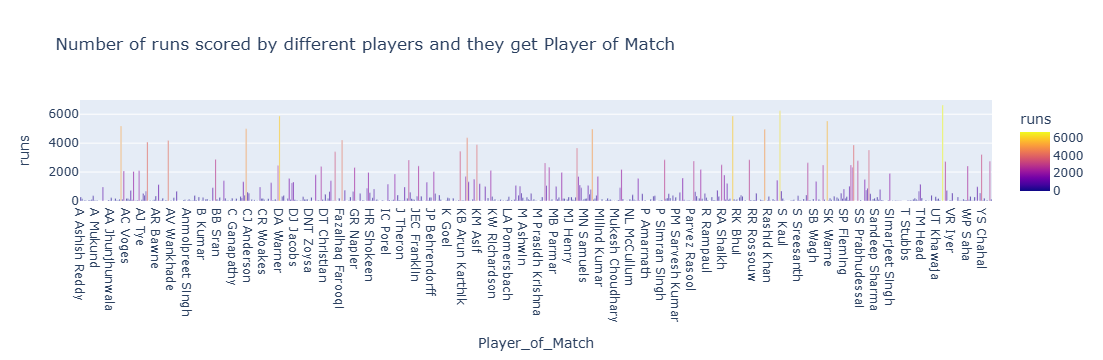

In [125]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
# show the plot
fig.show()

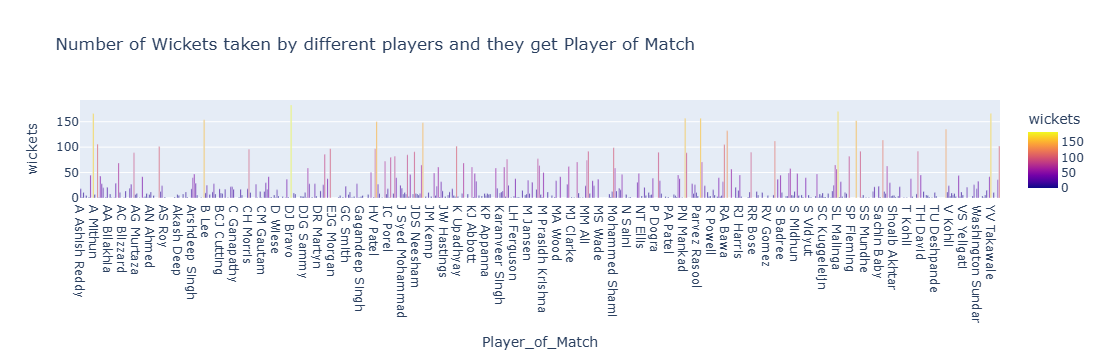

In [127]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

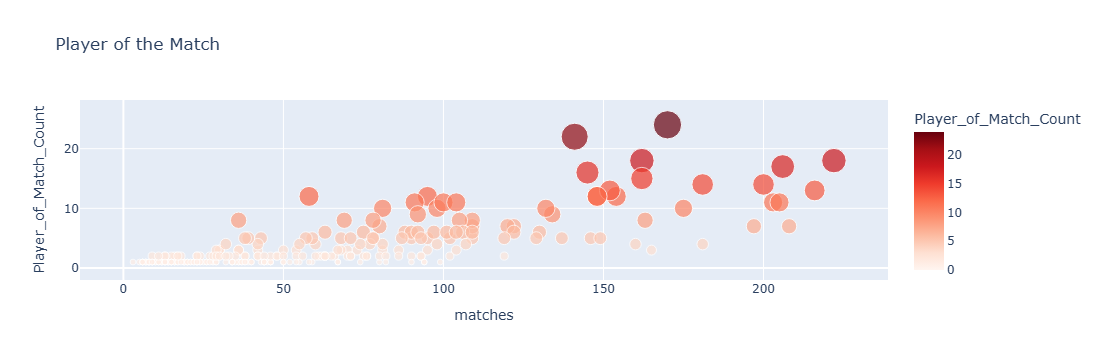

In [129]:
fig = px.scatter(final_df, x='matches', y='Player_of_Match_Count', color='Player_of_Match_Count',
                 size='Player_of_Match_Count', hover_name=final_df.index, title='Player of the Match')

# Update the color scale
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

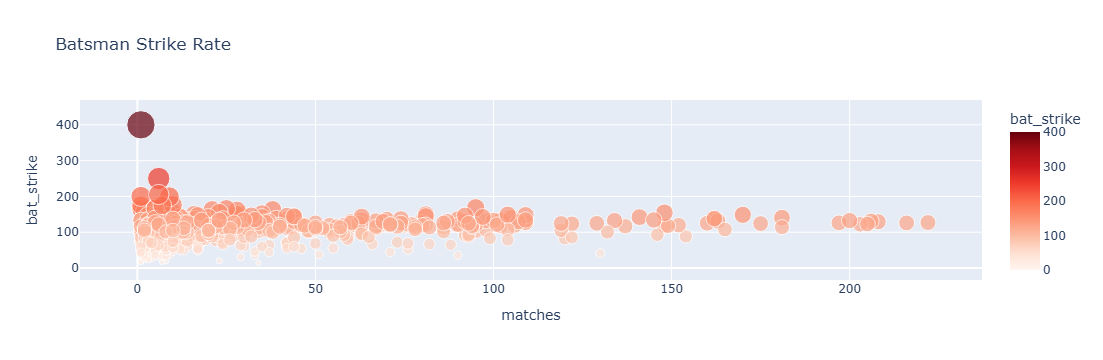

In [131]:
# Create the scatter plot to see Which player has best strike rate 
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))


fig.show()

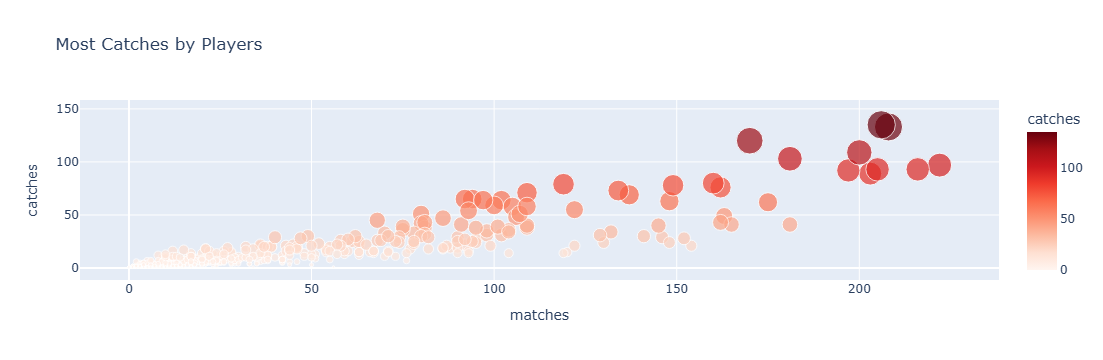

In [133]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

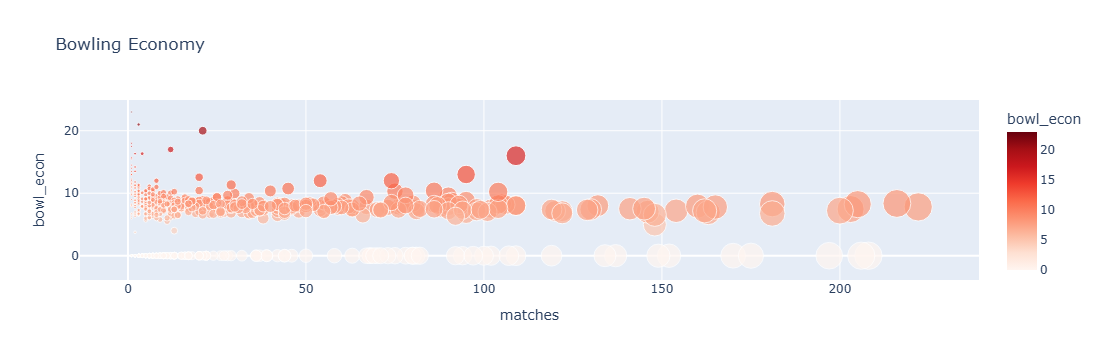

In [135]:
# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))
fig.show()

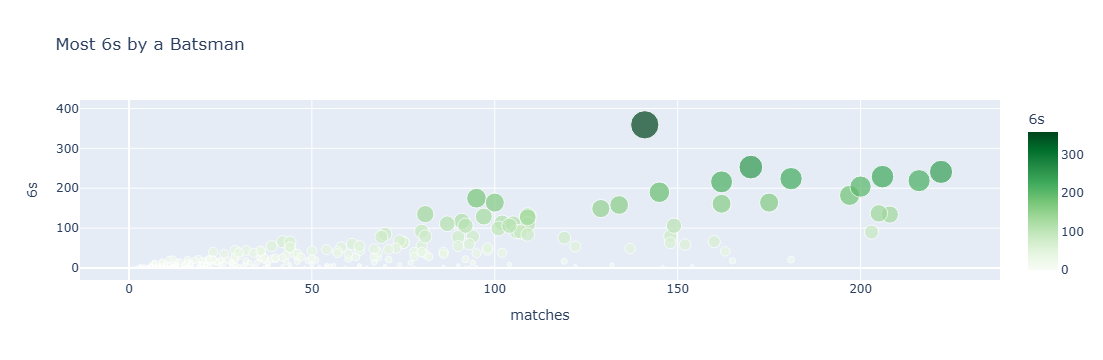

In [137]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

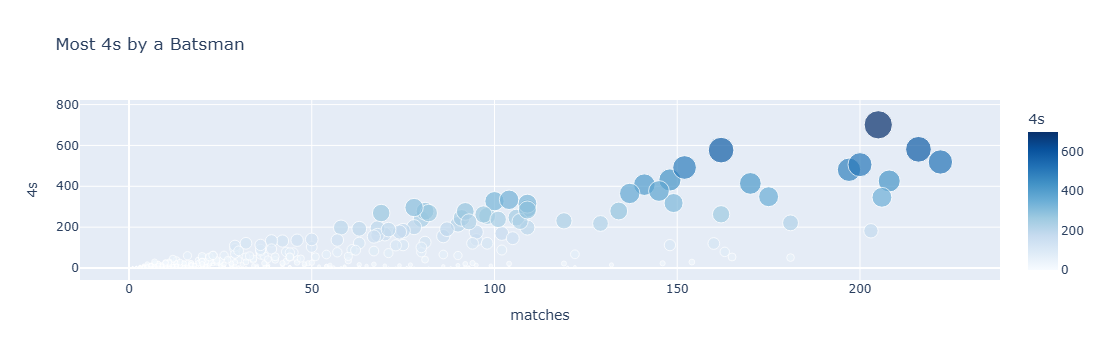

In [139]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

### As we see the best players in the IPL so far, Let's see the players who miss opportunities and score most time 0's to balls they faced or out most of the time in IPL so far.

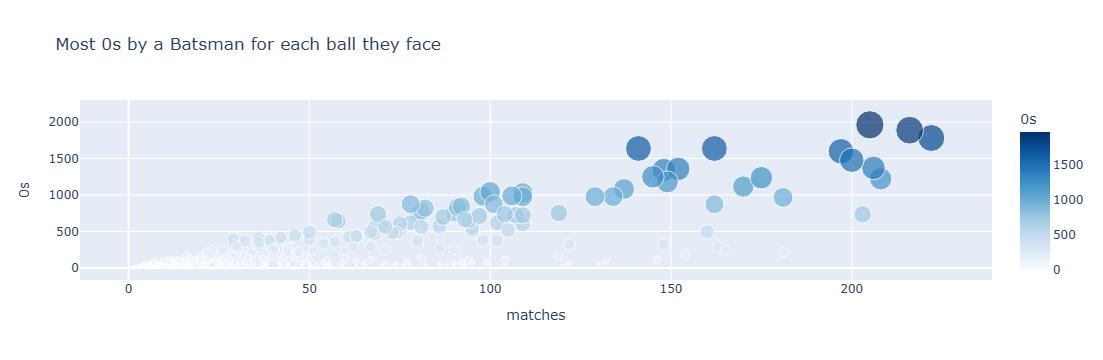

In [142]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

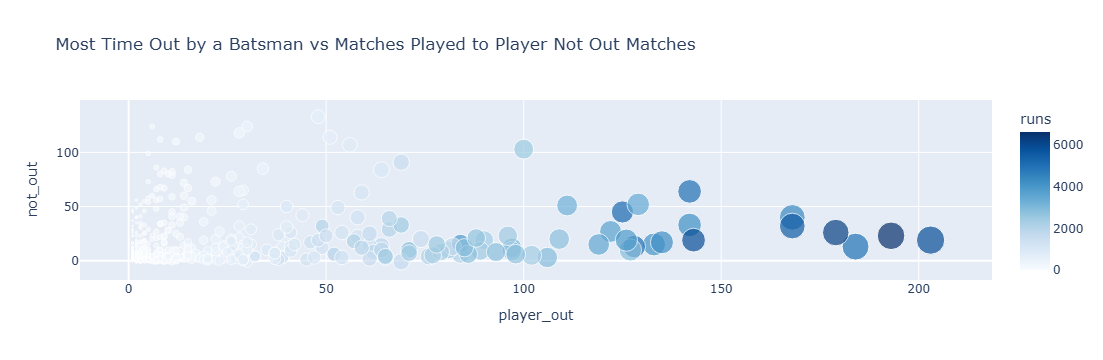

In [144]:
# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

## So after getting to know about about players best and lost performances, Let's move to visualizing Which are top 10 Batsman, Bowlers, Strike Rate, Best Team.

In [147]:
final_df = final_df[final_df['matches']>50]
final_df.head()

matches  Balls_Faced  innings    runs      0s      1s     2s    3s  \
12.0     154.0        410.0      2.0   362.0   182.0   172.0   22.0   0.0   
40.0      88.0         63.0      2.0    41.0    37.0    21.0    1.0   0.0   
106.0     76.0         50.0      2.0    26.0    31.0    16.0    1.0   0.0   
0.0      170.0       3487.0      4.0  5181.0  1115.0  1420.0  268.0  17.0   
37.0      80.0       1555.0      2.0  2069.0   737.0   417.0   66.0   4.0   

          4s     6s  player_out  bat_average  bat_strike  BallsThrow  wickets  \
12.0    29.0    5.0        30.0        12.07       88.29      3317.0    166.0   
40.0     3.0    1.0         8.0         5.12       65.08      1974.0    106.0   
106.0    2.0    0.0         9.0         2.89       52.00      1589.0     69.0   
0.0    414.0  253.0       125.0        41.45      148.58         0.0      0.0   
37.0   239.0   92.0        76.0        27.22      133.05         1.0      1.0   

       overs  runs_conceded  bowl_econ  bowl_strike_rate  catches  count  \
12.0   553.0         3976.0       7.19             19.98     21.0   12.0   
40.0   329.0         2495.0       7.58             18.62     19.0    6.0   
106.0  265.0         2073.0       7.82             23.03      7.0    2.0   
0.0      0.0            0.0       0.00              0.00    120.0   24.0   
37.0     0.0            0.0       0.00              1.00     51.0    7.0   

      Player_of_Match  Player_of_Match_Count  not_out  
12.0         A Mishra                   12.0    124.0  
40.0          A Nehra                    6.0     80.0  
106.0        AB Dinda                    2.0     67.0  
0.0    AB de Villiers                   24.0     45.0  
37.0     AC Gilchrist                    7.0      4.0

In [149]:
import plotly.graph_objects as go

In [151]:
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)

In [153]:
# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])

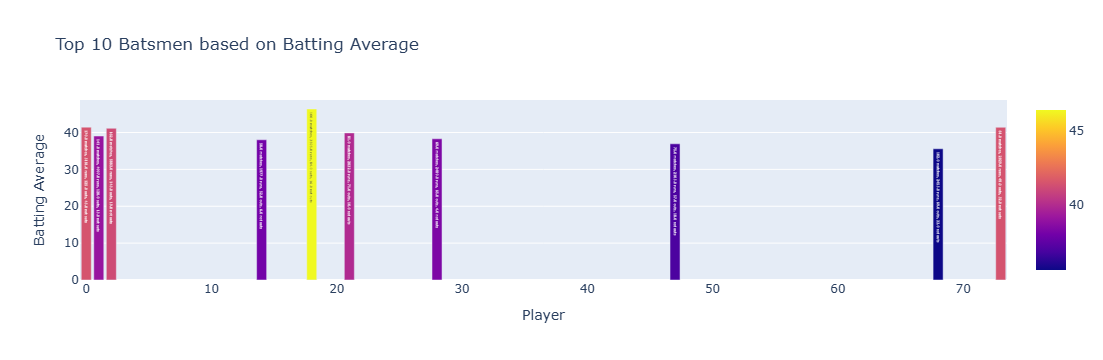

In [155]:
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")

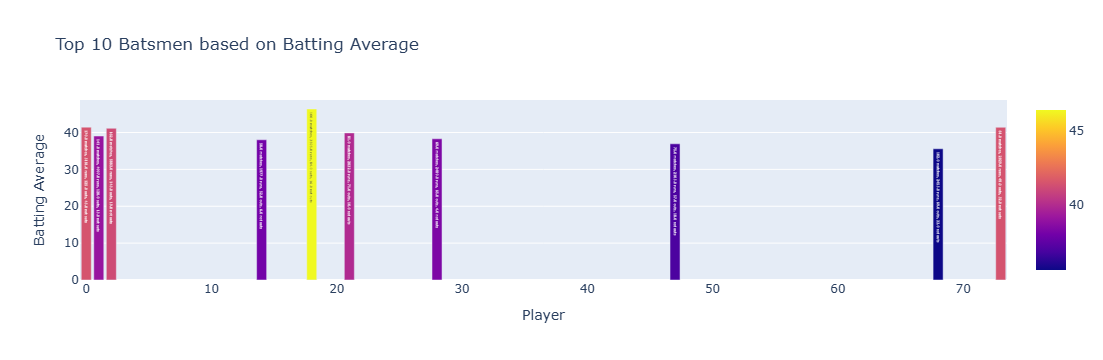

In [157]:
fig.show()

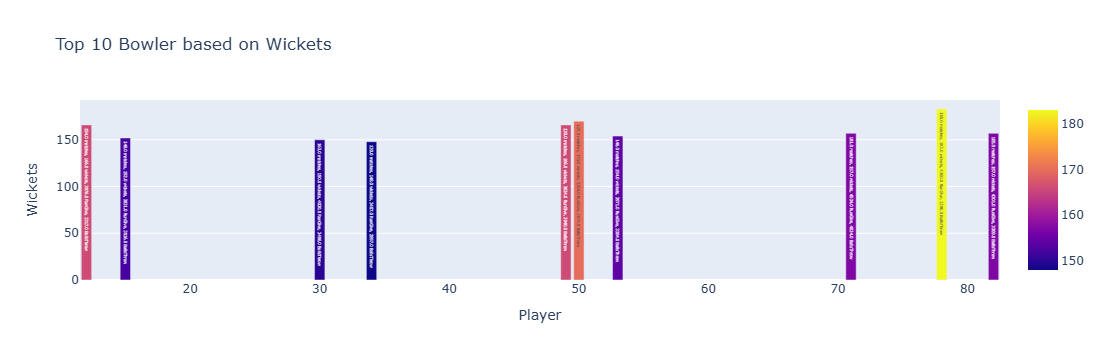

In [159]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [161]:
matches.head(2)

Date  MatchNumber                        Team1             Team2  \
0 2022-05-29        Final             Rajasthan Royals    Gujarat Titans   
1 2022-05-27  Qualifier 2  Royal Challengers Bangalore  Rajasthan Royals   

                              Venue        TossWinner TossDecision SuperOver  \
0  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals          bat         N   
1  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals        field         N   

        WinningTeam    WonBy  Margin Player_of_Match  \
0    Gujarat Titans  Wickets     7.0       HH Pandya   
1  Rajasthan Royals  Wickets     7.0      JC Buttler   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   

                                        Team2Players      Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...  CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...  CB Gaffaney   

       Umpire2  SEASON_INT  SEASON_END_INT  
0  Nitin Menon        2022            2022  
1  Nitin Menon        2022            2022

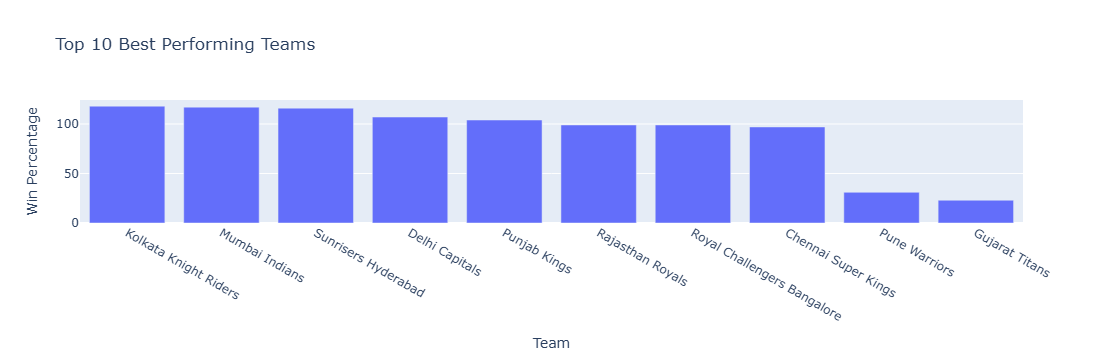

In [163]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

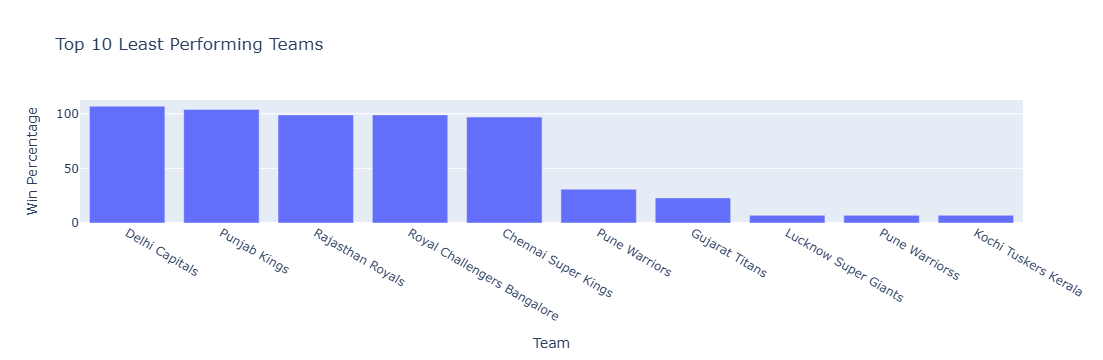

In [165]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [170]:
matches = pd.read_csv('Dataset/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

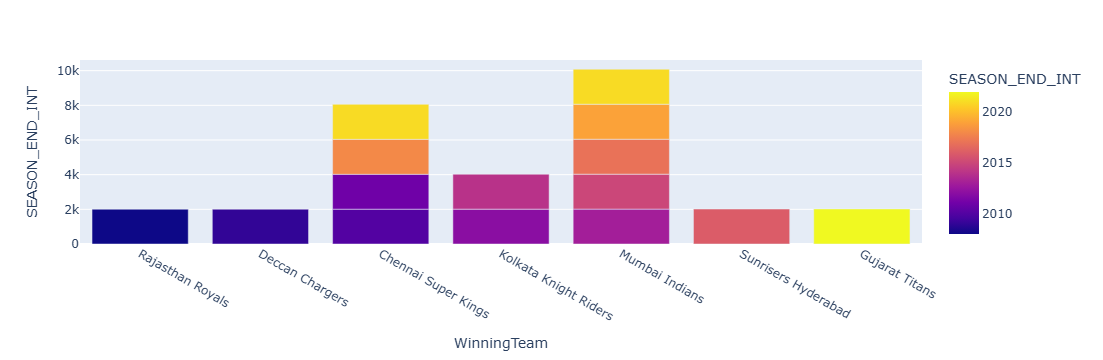

In [172]:
# Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

## Let's find out the Best Players of Time using K-Means Clustering

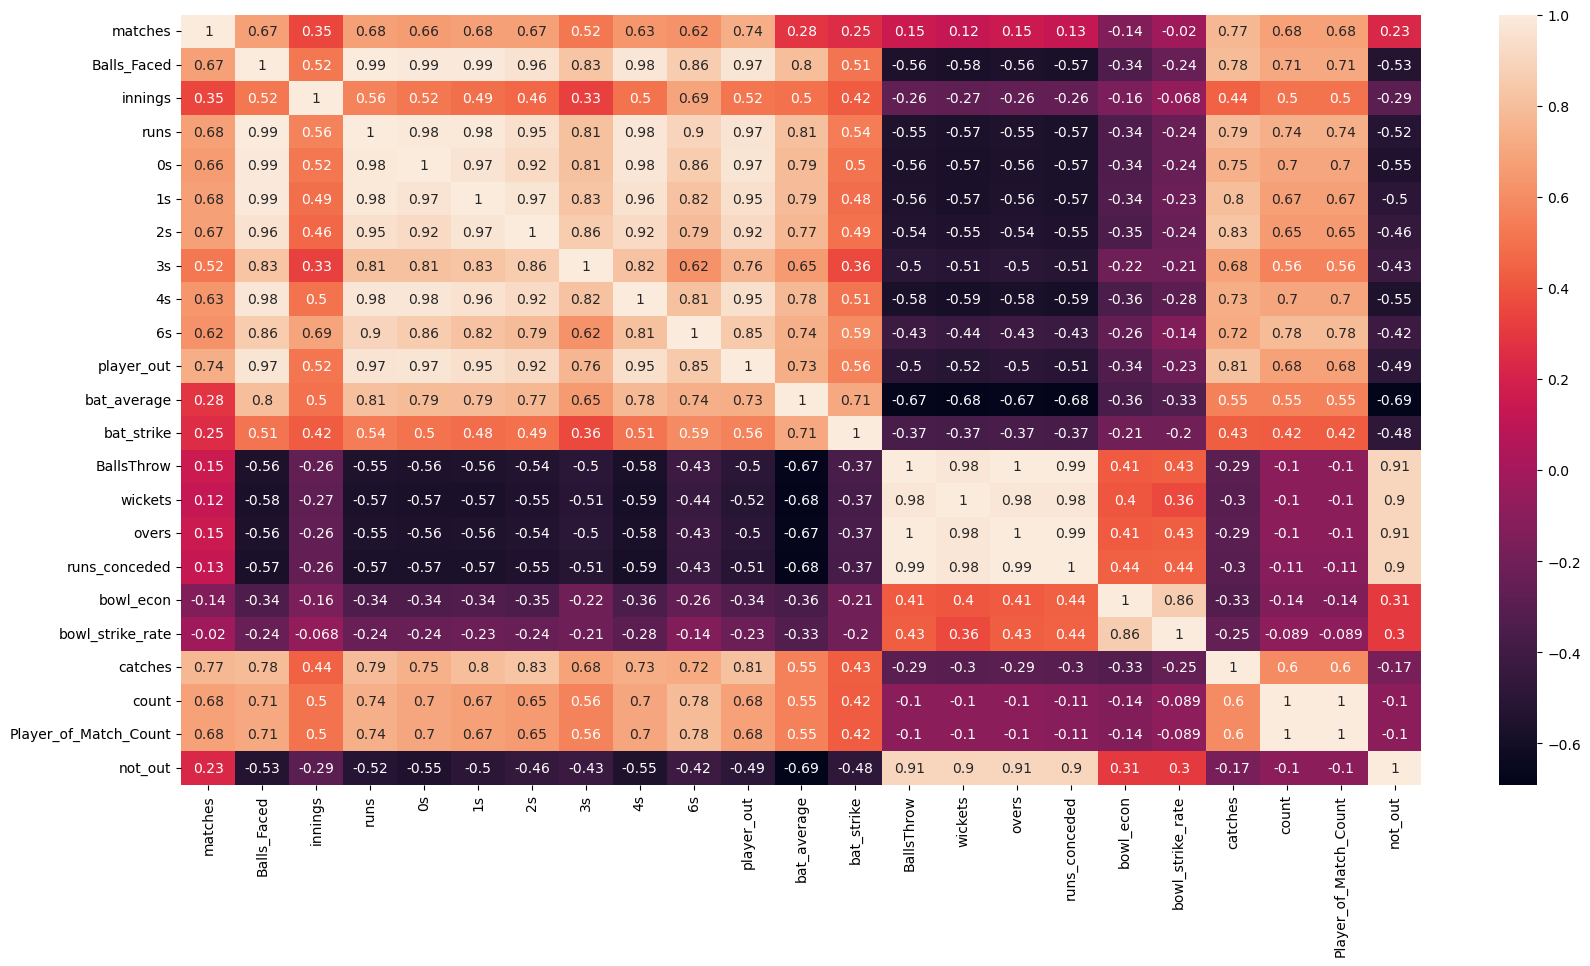

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_remove = ['Player_of_Match']

# Drop non-numeric columns if they are not relevant for correlation analysis
final_df_numeric = final_df.drop(columns=columns_to_remove)

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(final_df_numeric.corr(), annot=True)
plt.show()


In [177]:
def correlation(data, threshold):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Find correlations above threshold
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    
    return col_corr

# Call the correlation function
corr_cols = correlation(final_df, 0.85)
print(corr_cols)


['runs', '0s', '1s', '2s', '3s', '4s', '6s', 'player_out', 'wickets', 'overs', 'runs_conceded', 'bowl_strike_rate', 'Player_of_Match_Count', 'not_out']


In [179]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [181]:
final_df_numeric = final_df.select_dtypes(include=np.number)  # Select only numeric columns

final_df_new = final_df_numeric[np.isfinite(final_df_numeric).all(1)]  # Filter rows with only finite values


In [183]:
final_df_new.head()

matches  Balls_Faced  innings    runs      0s      1s     2s    3s  \
12.0     154.0        410.0      2.0   362.0   182.0   172.0   22.0   0.0   
40.0      88.0         63.0      2.0    41.0    37.0    21.0    1.0   0.0   
106.0     76.0         50.0      2.0    26.0    31.0    16.0    1.0   0.0   
0.0      170.0       3487.0      4.0  5181.0  1115.0  1420.0  268.0  17.0   
37.0      80.0       1555.0      2.0  2069.0   737.0   417.0   66.0   4.0   

          4s     6s  player_out  bat_average  bat_strike  BallsThrow  wickets  \
12.0    29.0    5.0        30.0        12.07       88.29      3317.0    166.0   
40.0     3.0    1.0         8.0         5.12       65.08      1974.0    106.0   
106.0    2.0    0.0         9.0         2.89       52.00      1589.0     69.0   
0.0    414.0  253.0       125.0        41.45      148.58         0.0      0.0   
37.0   239.0   92.0        76.0        27.22      133.05         1.0      1.0   

       overs  runs_conceded  bowl_econ  bowl_strike_rate  catches  count  \
12.0   553.0         3976.0       7.19             19.98     21.0   12.0   
40.0   329.0         2495.0       7.58             18.62     19.0    6.0   
106.0  265.0         2073.0       7.82             23.03      7.0    2.0   
0.0      0.0            0.0       0.00              0.00    120.0   24.0   
37.0     0.0            0.0       0.00              1.00     51.0    7.0   

       Player_of_Match_Count  not_out  
12.0                    12.0    124.0  
40.0                     6.0     80.0  
106.0                    2.0     67.0  
0.0                     24.0     45.0  
37.0                     7.0      4.0